# Task 2: Model Baseline and Data preparation

**Course:** Introduction to Data Science
**Lecturer:** Prof. Dr. Hendrik Meth

**Group 2:**
- Linus Breitenberger
- Tristan Ruhm
- Prarichut Poachanuan
- Anushka Irphale
- Patryk Gadziosmki

<div style="width:100%;height:30px;background-color:#E31134"></div>

## 0. Importing Requirements

In [857]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [858]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 1.1. Minimal Preprocessing

In [859]:
# Replacing all MissingValues with the most frequent values (don't make any sense, just for the working code)
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

In [860]:
# 'dteday' is not neccessary and breaks the code

train_df = train_df.drop('dteday', axis=1)
test_df = test_df.drop('dteday', axis=1)

### 1.2. Features/Label - Train/Test Split

In [861]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [862]:
# Check the split

# train_features
# train_labels
# test_features
# test_labels

### 1.3. Linear Regresion

In [863]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[ 1.24294882e+00  3.15719720e+02  1.99436579e+03 -3.54038301e+00
  -1.04678985e+03  1.82091578e+02 -4.71749309e+02 -7.48293456e+02
  -1.55008874e+01  7.94676335e+03 -7.04580755e+00 -6.30206852e+02
   9.13325512e-01]]


In [864]:
# Predict all test examples
baseline_pred = baseline_model.predict(test_features)
baseline_pred

array([[3406.9932736 ],
       [5089.67118593],
       [6893.58964078],
       [2381.29972783],
       [3495.756797  ],
       [ 696.39473747],
       [7629.06916376],
       [5843.83408871],
       [6781.57592485],
       [5900.84318077],
       [5367.8802674 ],
       [7521.66103429],
       [3392.46884844],
       [8149.93997078],
       [6684.35830847],
       [7905.54699563],
       [7412.91704975],
       [2419.05241288],
       [5465.43898259],
       [7696.61069886],
       [7510.5236049 ],
       [4989.11532123],
       [4176.96843099],
       [1240.87449579],
       [6273.7230086 ],
       [5420.55149342],
       [5942.6946315 ],
       [4730.3594732 ],
       [7547.89727355],
       [5307.62372381],
       [6138.19940021],
       [7362.78098889],
       [7256.54392756],
       [5573.02496653],
       [1283.71452962],
       [5776.50021622],
       [2670.1314791 ],
       [1354.34383982],
       [2787.95457997],
       [5331.39070204],
       [5319.01750342],
       [1312.922

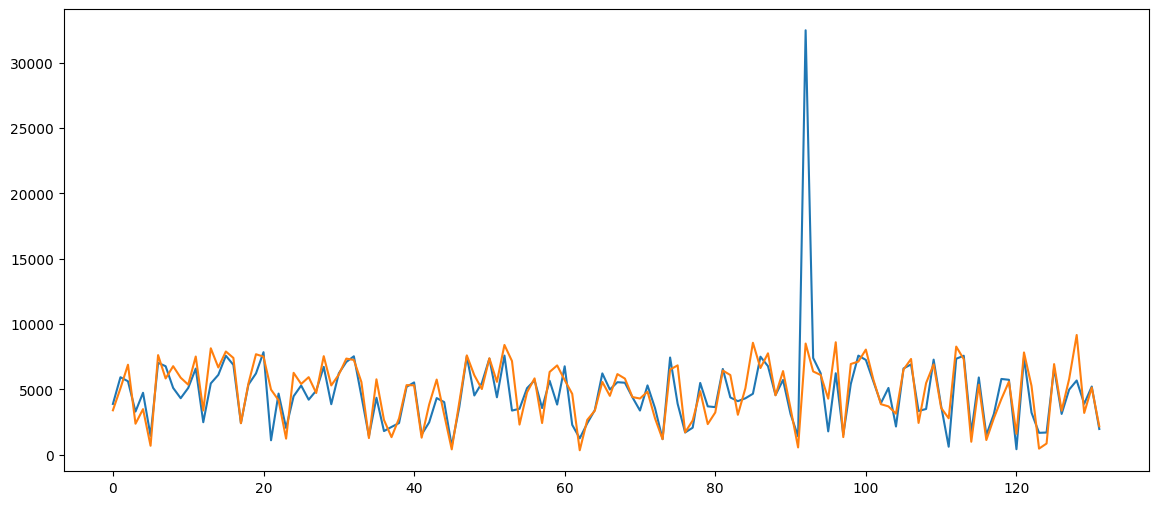

In [865]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(baseline_pred)

In [866]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         3.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
hum           108.062550
windspeed       0.148642
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3406.9932736]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -487.006726
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [867]:
print(round(baseline_pred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -48700000.0
1  -84600000.0
2  126500000.0
3  -92900000.0
4 -125200000.0
5  -75400000.0
6   58900000.0
7  -93400000.0
8  166300000.0
9  156900000.0 2


### 1.4. Evaluate Baseline model

In [868]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, baseline_pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 1054.862
R^2 value of the model:  0.4001965370904248


## 2. Preprocessing

In [869]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 2.1. Train Data Preprocessing

In [870]:
#hum has to many outliers
#windspeed has only 4 outliers, can be handled via imputation
print("Hum Outliers: ", len(train_df[train_df["hum"] > 100])) # drop / don't use later
print("Windspeed Outliers: ", len(train_df[train_df["windspeed"] < 0]))

Hum Outliers:  229
Windspeed Outliers:  4


In [871]:
#replacing outliers of windspeed with the median 
for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

In [872]:
#replace missing values of season via dteday
for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)

In [873]:
train_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836


In [874]:
#replace the missing values via dteday, new order
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek
train_df['weekday']

0      0
1      6
2      1
3      0
4      1
      ..
595    2
596    5
597    3
598    2
599    2
Name: weekday, Length: 600, dtype: int32

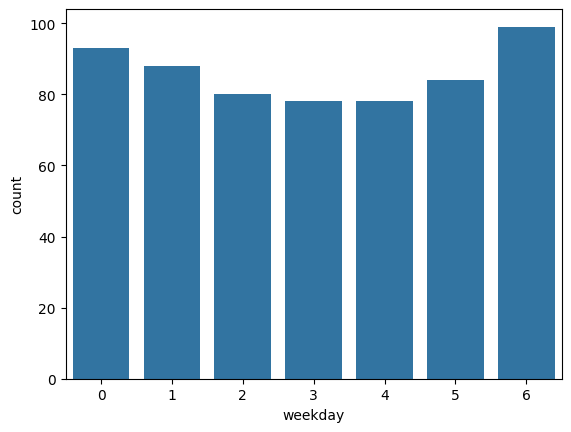

In [875]:
sns.countplot(x='weekday', data=train_df)
plt.show()

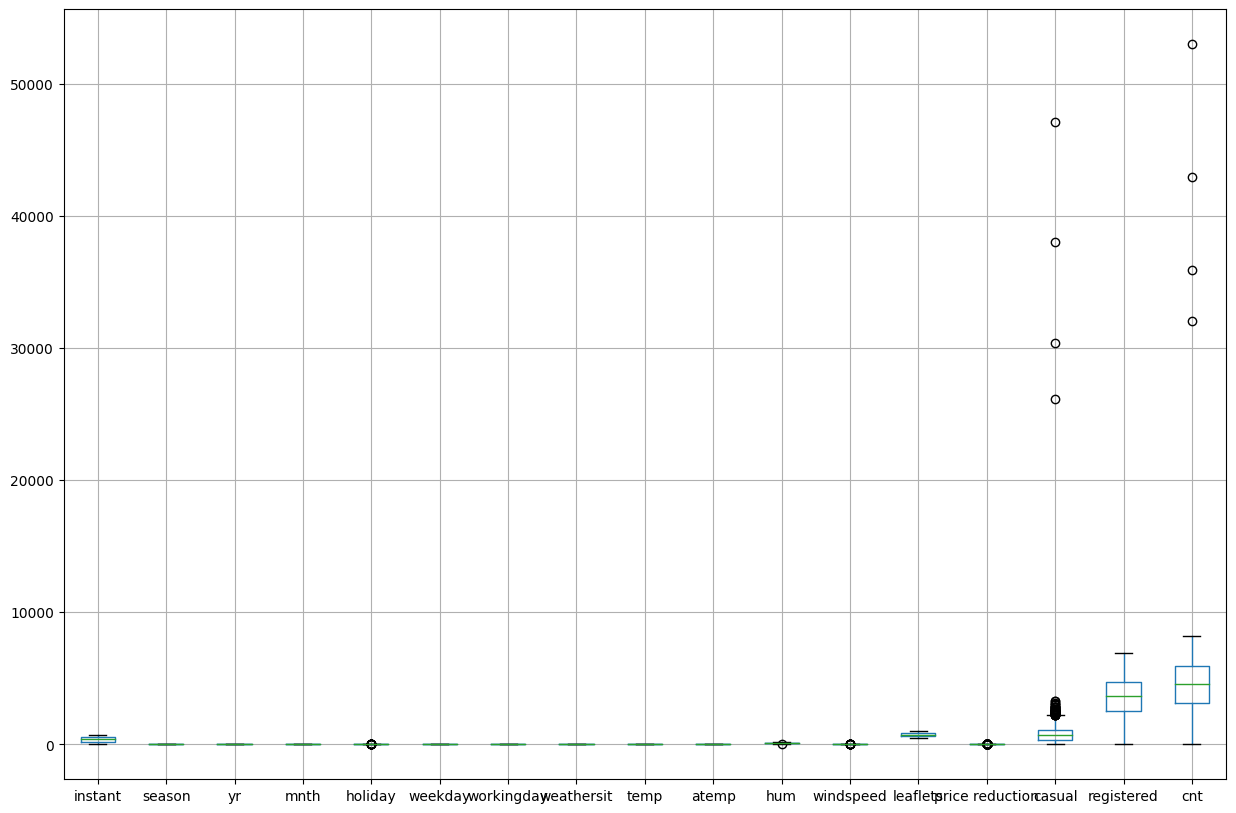

In [876]:
boxplot = train_df.boxplot(figsize=(15, 10))
plt.show()

In [877]:
index_names = train_df[ train_df['cnt'] > 20000 ].index 
# drop these row indexes 
# from dataFrame 
train_df = train_df.drop(index_names) 

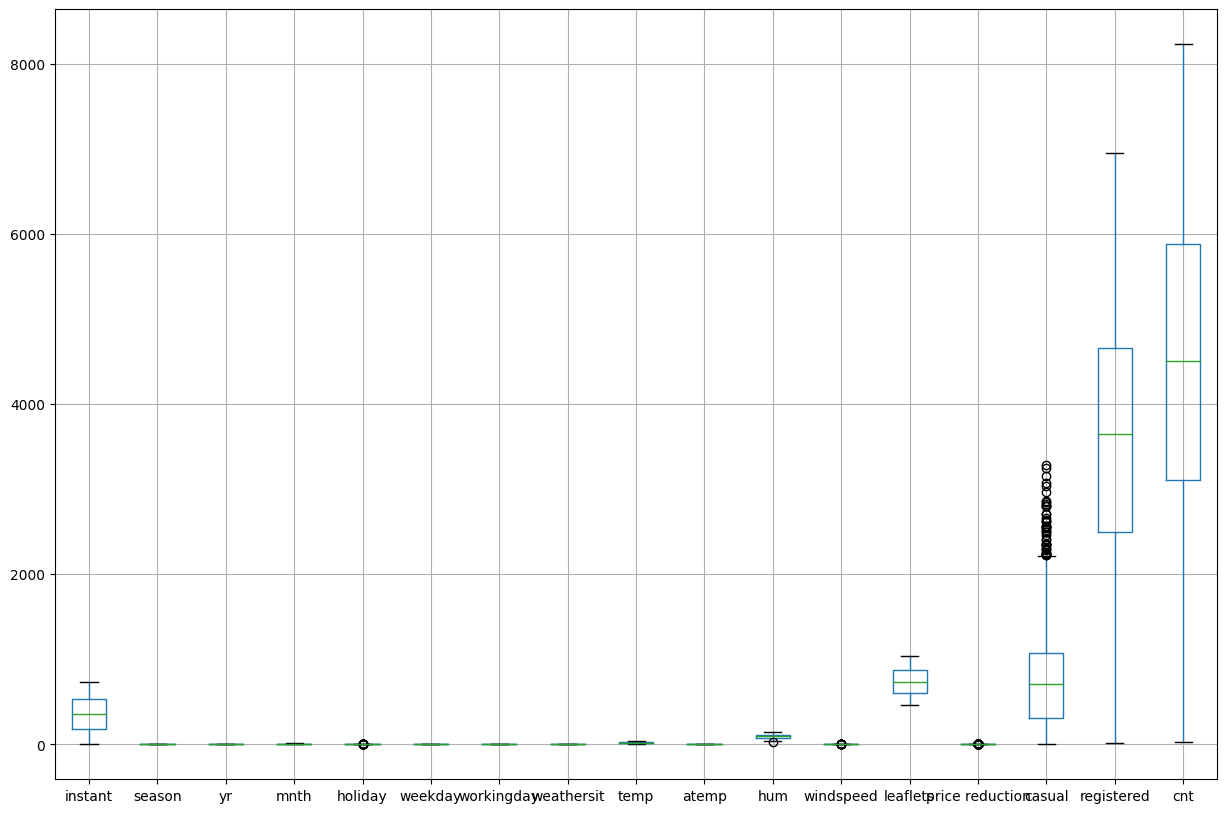

In [878]:
boxplot = train_df.boxplot(figsize=(15, 10))
plt.show()

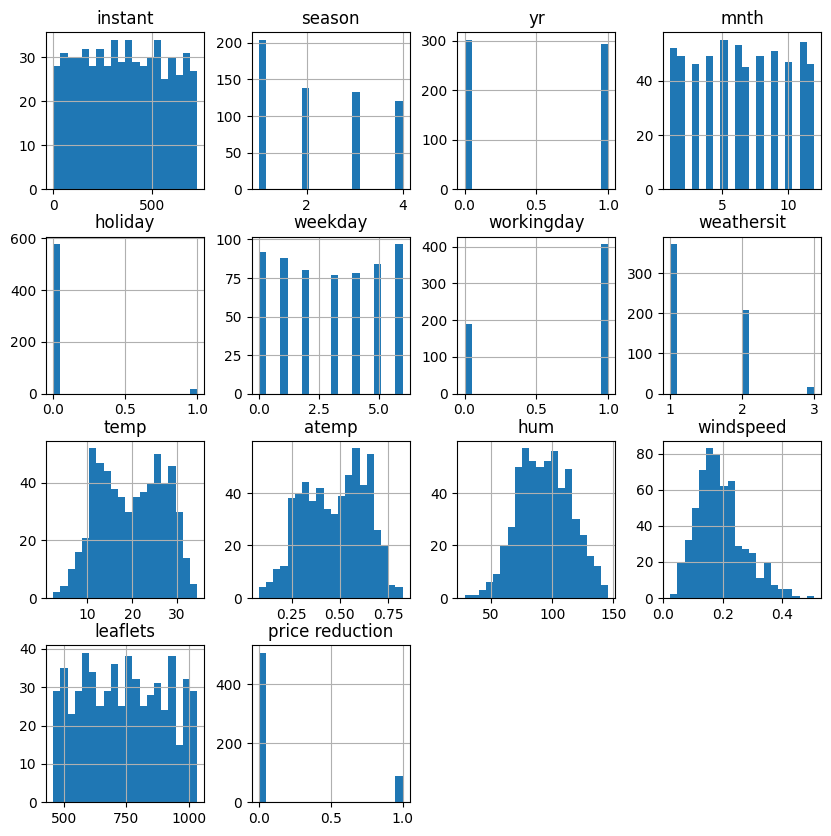

In [879]:
# histogram plot
hist = train_df.iloc[:, :15].hist(bins=20,figsize=(10, 10))
# windspeed seems to be skewed, so we will normalize this feature

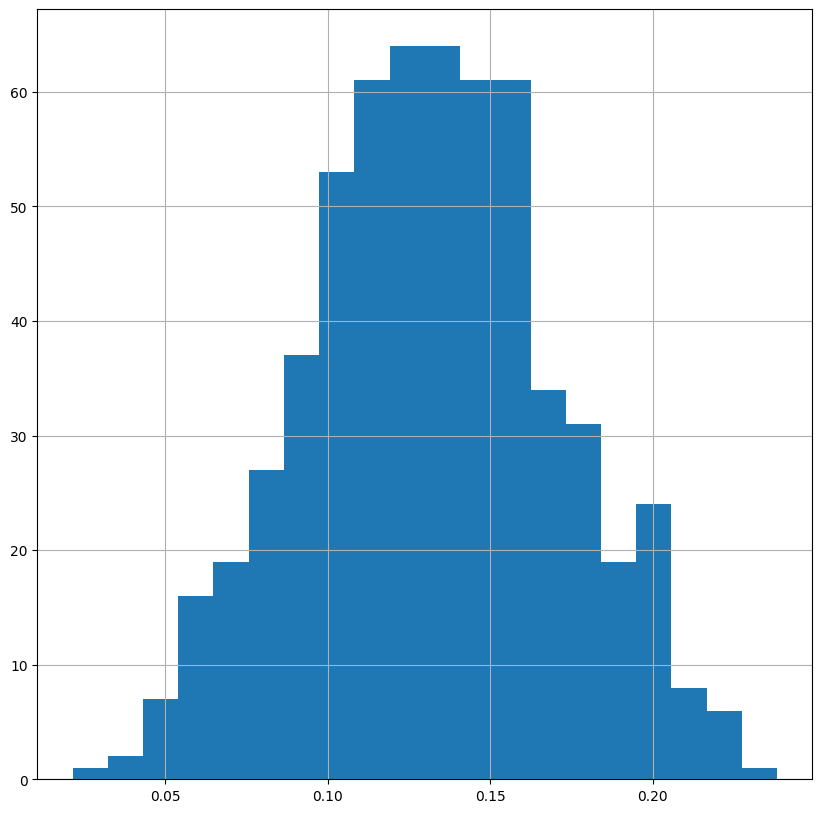

In [880]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].array.reshape(-1, 1)))


train_df['windspeed']=trans_temp
hist = train_df['windspeed'].hist(bins=20,figsize=(10, 10))

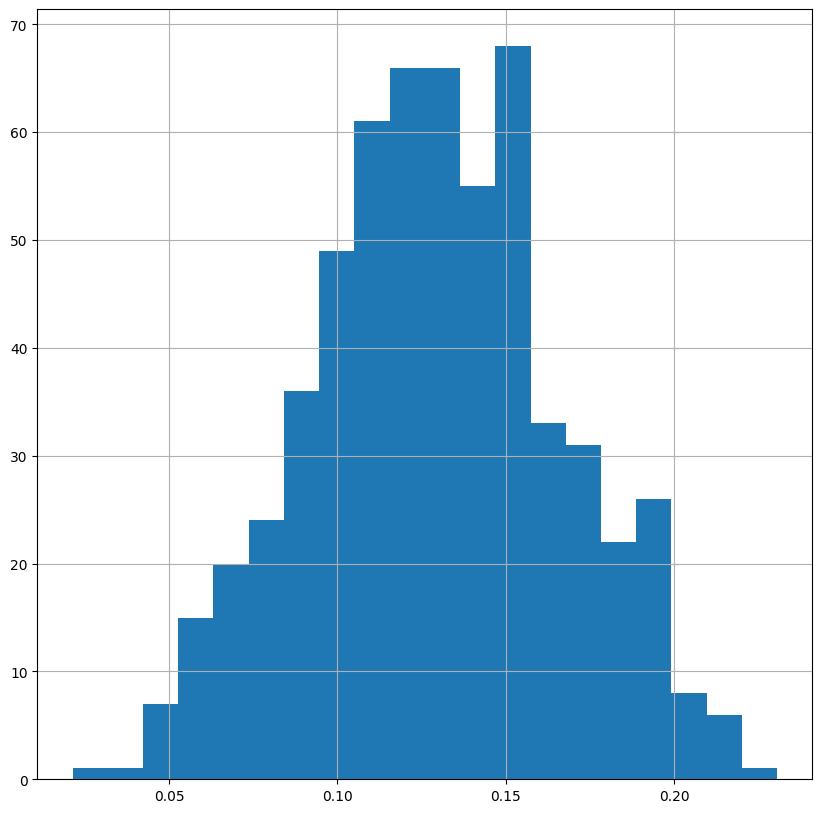

In [881]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].values.reshape(-1, 1)))


train_df['windspeed']=trans_temp
hist = train_df['windspeed'].hist(bins=20,figsize=(10, 10))

In [882]:
train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,0,1,1,24.8000,0.587133,53.12505,0.161118,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,6,1,2,12.8667,0.324492,93.06255,0.114392,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,1,1,1,6.0000,0.126275,66.18750,0.198321,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,0,0,1,26.5667,0.614925,84.25005,0.172953,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,1,0,2,20.5667,0.505046,113.37495,0.089160,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,2,0,1,18.9000,0.466525,56.87505,0.199010,1022,1,1424,1693,3117
596,81,22.03.2011,1.0,0,3,0,5,1,1,17.6667,0.440642,93.68745,0.149874,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,3,1,2,15.3000,0.381938,120.43755,0.129101,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.111974,605,0,404,3490,3894


### 2.2. Test Data Preprocessing

In [883]:
#Again, alot of hum values are over 100, so we have some outliers here, so we delete it also
print(len(test_df[test_df["hum"] > 100]))

45


In [884]:
for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

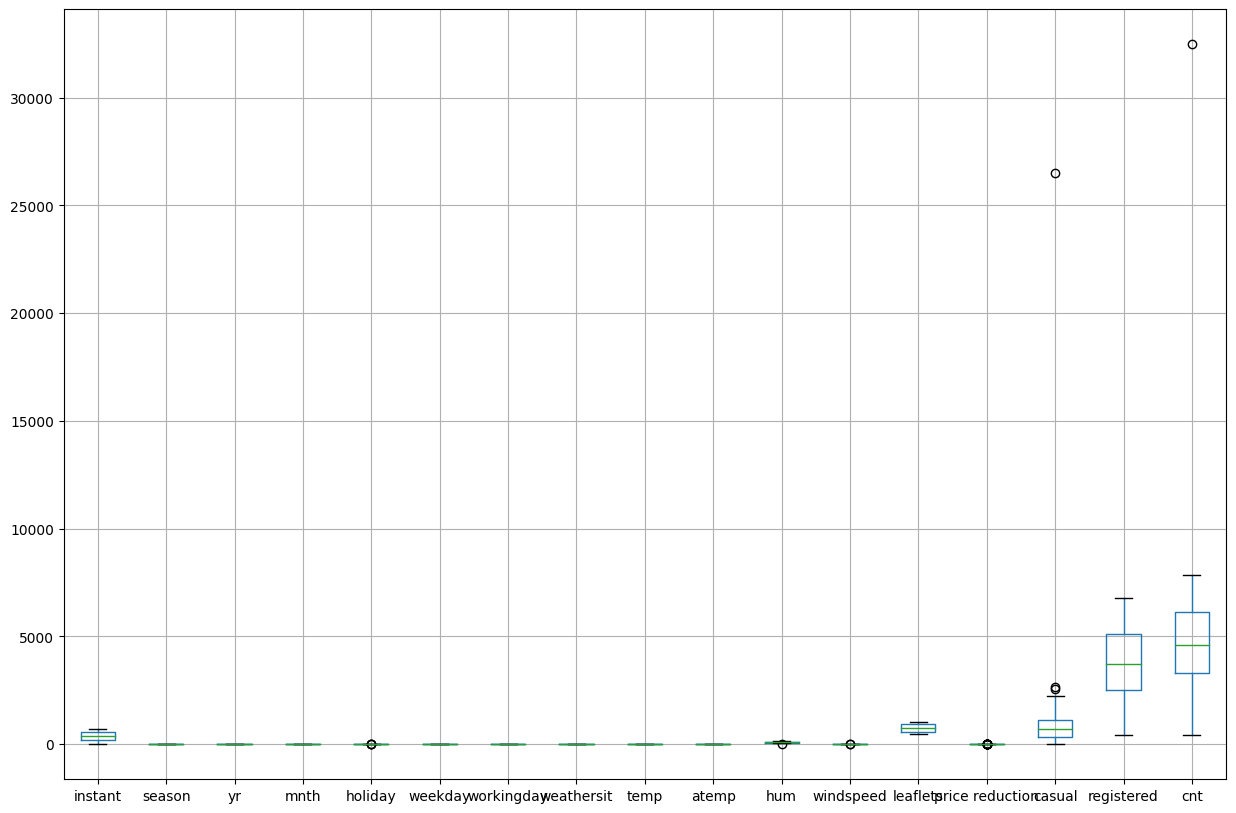

In [885]:
boxplot = test_df.boxplot(figsize=(15, 10))
plt.show()

In [886]:
feature_test_df = test_df.iloc[:, :15]
feature_test_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction
0,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.148642,605,0
1,458,02.04.2012,2.0,1,4,0,0,1,1,17.3565,0.427513,75.65220,0.312139,518,0
2,687,17.11.2012,4.0,1,11,0,1,0,1,13.0000,0.326383,81.81255,0.179729,766,0
3,346,12.12.2011,4.0,0,12,0,2,1,1,9.5333,0.270196,NaN,0.063450,739,0
4,291,18.10.2011,4.0,0,10,0,1,1,2,21.3000,0.522721,105.25005,0.110087,463,0


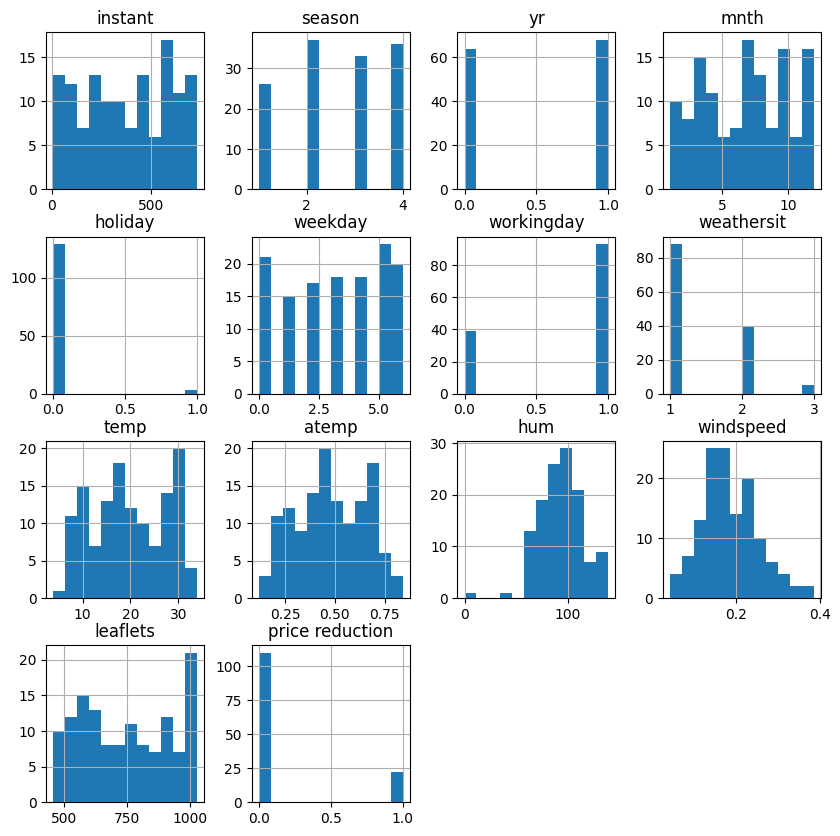

In [887]:
hist = feature_test_df.hist(bins=12,figsize=(10, 10))

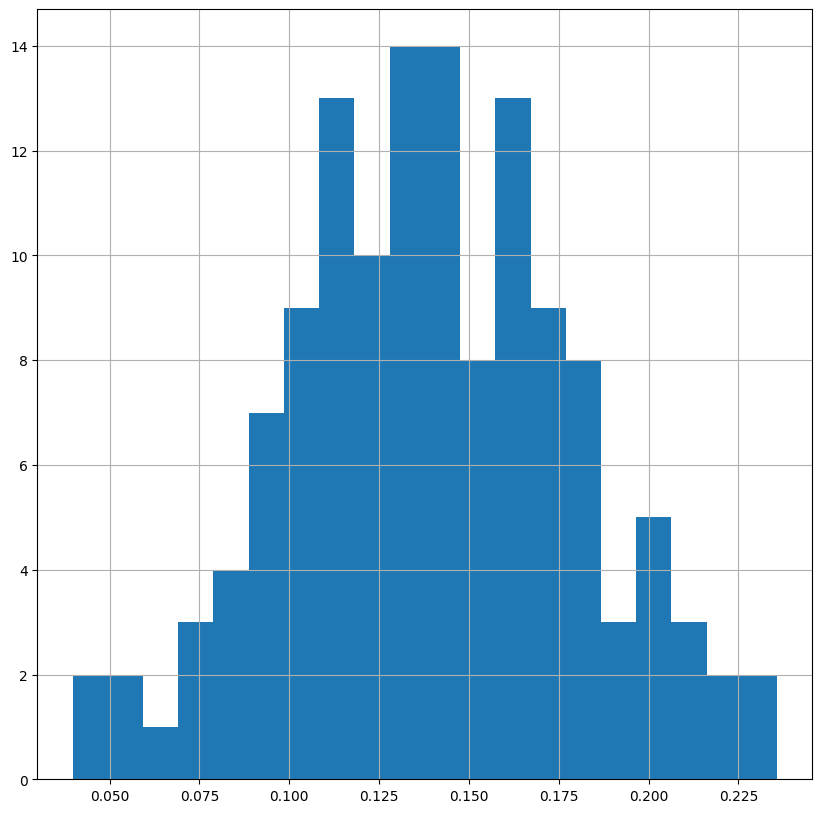

In [888]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].values.reshape(-1, 1)))

feature_test_df['windspeed ptransformed']=trans_windspeed
test_df['windspeed'] = feature_test_df['windspeed ptransformed']
hist = test_df['windspeed'].hist(bins=20,figsize=(10, 10))

In [889]:
test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.120161,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,0,1,1,17.3565,0.427513,75.65220,0.206779,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,1,0,1,13.0000,0.326383,81.81255,0.139545,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,2,1,1,9.5333,0.270196,NaN,0.057694,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,1,1,2,21.3000,0.522721,105.25005,0.093734,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,6,1,1,19.4333,0.475371,92.31255,0.166143,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,0,0,1,30.6000,0.687508,90.18750,0.128105,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,4,1,2,25.4000,0.575158,127.31250,0.120153,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,5,1,1,29.1333,0.654688,74.68755,0.183799,585,0,848,4377,5225


## 3. Feature Selection

### 3.1. Correlation

In [890]:
# 'instant' and 'dteday' are not neccessary
train_df = train_df.drop(['dteday'], axis=1).drop('instant', axis=1).drop('hum', axis=1).drop('casual', axis=1).drop('registered', axis=1)
test_df = test_df.drop('dteday', axis=1).drop('instant', axis=1).drop('hum', axis=1).drop('casual', axis=1).drop('registered', axis=1)

In [891]:
#calculate correlations between all features of your data frame (see Exploration lab)
train_corr = train_df.corr()
print(train_corr)

# Displaying correlations as a heatmap / correlation matrix 
train_corr.style.background_gradient(cmap='coolwarm')

                   season        yr      mnth   holiday   weekday  workingday  \
season           1.000000 -0.033477  0.685960 -0.001416 -0.009581   -0.005619   
yr              -0.033477  1.000000 -0.028837  0.021979 -0.025109    0.008882   
mnth             0.685960 -0.028837  1.000000  0.035441  0.017818   -0.020155   
holiday         -0.001416  0.021979  0.035441  1.000000 -0.062369   -0.258964   
weekday         -0.009581 -0.025109  0.017818 -0.062369  1.000000   -0.002467   
workingday      -0.005619  0.008882 -0.020155 -0.258964 -0.002467    1.000000   
weathersit       0.032999 -0.039531  0.072770 -0.022563  0.043374    0.067185   
temp             0.316933  0.030209  0.207435 -0.023457 -0.028104    0.052450   
atemp            0.319582  0.028998  0.213059 -0.027784 -0.022056    0.050782   
windspeed       -0.211800 -0.021385 -0.258380  0.015886  0.019229    0.001836   
leaflets        -0.007392 -0.080441 -0.076208 -0.048116  0.005699    0.012017   
price reduction -0.010487 -0

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,cnt
season,1.000000,-0.033477,0.685960,-0.001416,-0.009581,-0.005619,0.032999,0.316933,0.319582,-0.211800,-0.007392,-0.010487,0.348816
yr,-0.033477,1.000000,-0.028837,0.021979,-0.025109,0.008882,-0.039531,0.030209,0.028998,-0.021385,-0.080441,-0.008500,0.549341
mnth,0.685960,-0.028837,1.000000,0.035441,0.017818,-0.020155,0.072770,0.207435,0.213059,-0.258380,-0.076208,-0.026320,0.252699
holiday,-0.001416,0.021979,0.035441,1.000000,-0.062369,-0.258964,-0.022563,-0.023457,-0.027784,0.015886,-0.048116,-0.046430,-0.068206
weekday,-0.009581,-0.025109,0.017818,-0.062369,1.000000,-0.002467,0.043374,-0.028104,-0.022056,0.019229,0.005699,0.055231,-0.064559
workingday,-0.005619,0.008882,-0.020155,-0.258964,-0.002467,1.000000,0.067185,0.052450,0.050782,0.001836,0.012017,0.032606,0.059241
weathersit,0.032999,-0.039531,0.072770,-0.022563,0.043374,0.067185,1.000000,-0.095019,-0.095395,0.048001,-0.020918,0.036114,-0.299036
temp,0.316933,0.030209,0.207435,-0.023457,-0.028104,0.052450,-0.095019,1.000000,0.990331,-0.158017,0.011679,-0.020604,0.631948
atemp,0.319582,0.028998,0.213059,-0.027784,-0.022056,0.050782,-0.095395,0.990331,1.000000,-0.185680,0.009075,-0.016678,0.635856
windspeed,-0.211800,-0.021385,-0.258380,0.015886,0.019229,0.001836,0.048001,-0.158017,-0.185680,1.000000,-0.024513,0.039638,-0.253797


In [892]:
#calculate correlations of features to label
train_df_corr_label = train_df.iloc[:, :].corr()["cnt"]
# print(train_df_corr_label)

### 3.2. Actually Feature Selection

In [893]:
# All the preprocessed features
# train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index]

# The four features with the highest correlation with count -------> (favorit)
train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index[:5]]

train_corr_high

,cnt,atemp,temp,yr,season
0,5312,0.587133,24.8000,0,2.0
1,5445,0.324492,12.8667,1,4.0
2,2236,0.126275,6.0000,1,1.0
3,6370,0.614925,26.5667,1,2.0
4,7836,0.505046,20.5667,1,1.0
...,...,...,...,...,...
595,3117,0.466525,18.9000,0,1.0
596,2703,0.440642,17.6667,0,1.0
597,4097,0.381938,15.3000,1,1.0
598,3894,0.472846,19.3667,0,4.0


## 4. New Linear Regression Model

### 4.1. Split

In [894]:
# Splitting the train data into features and labels
train_features = train_corr_high.iloc[:, 1:]
train_labels = train_corr_high.iloc[:, :1]

# Splitting the test data into features and labels
test_data = test_df[train_corr_high.columns]
test_features = test_data.iloc[:, 1:]
test_labels = test_data.iloc[:, :1]

# train_features
# train_labels
# test_features
# test_labels


### 4.2. Linear Regression

In [895]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
model = linear_model.LinearRegression()

model.fit(train_features, train_labels)

print(model.coef_)

[[5816.26101408   18.5433873  2053.47781298  314.16433813]]


In [896]:
# Predict all test examples
pred = model.predict(test_features)
pred

array([[3978.94306393],
       [5103.14772295],
       [5062.49365608],
       [2617.93322476],
       [4304.87901267],
       [1144.30745619],
       [7023.08727814],
       [6287.34649247],
       [4984.34367644],
       [5469.23277478],
       [4617.83653781],
       [6692.95536127],
       [1936.57197923],
       [7431.60168444],
       [6152.98217857],
       [7022.36928478],
       [6995.44573514],
       [3556.24162211],
       [4614.64280676],
       [7271.96334198],
       [6312.36869835],
       [4756.39847113],
       [3914.58556222],
       [2013.15580001],
       [4734.73612186],
       [4984.81437479],
       [4769.82167766],
       [4340.85788405],
       [6449.02481882],
       [5011.73816716],
       [5909.76471793],
       [7135.08415169],
       [6496.1425256 ],
       [4820.7237192 ],
       [1142.31225031],
       [5296.69468757],
       [3837.22976567],
       [2037.22794412],
       [2474.75432737],
       [4456.95381986],
       [4678.98071538],
       [1100.387

### 4.3. Evaluation

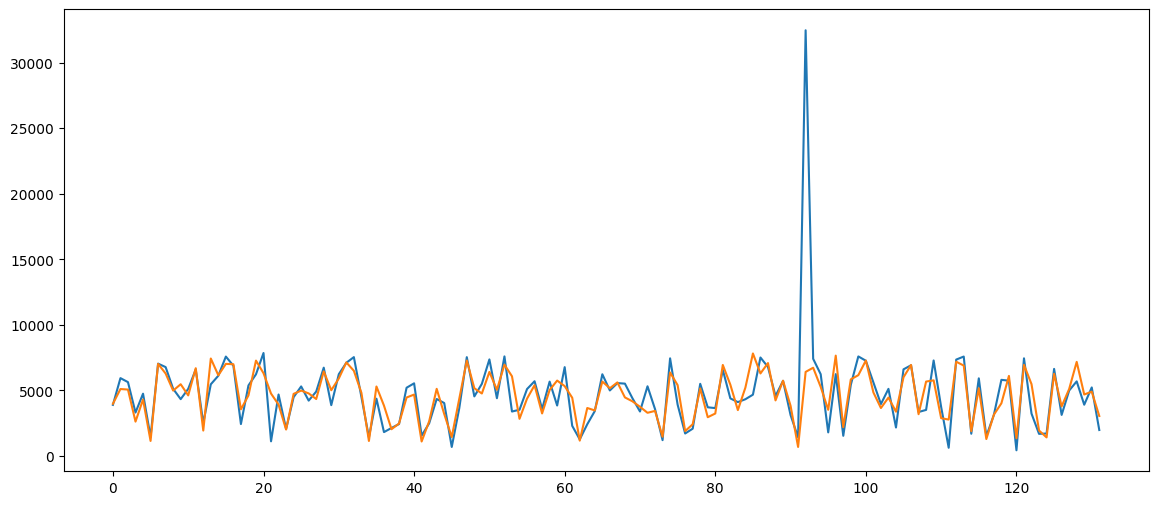

In [897]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(pred)

In [898]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", predicted_value - test_labels.iloc[0])

Predict label for following example:
atemp      0.472846
temp      19.366700
yr         0.000000
season     4.000000
Name: 0, dtype: float64

Predicted label:  [3978.94306393]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt    84.943064
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [899]:
print(round(pred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0    8500000.0
1  -83300000.0
2  -56700000.0
3  -69200000.0
4  -44300000.0
5  -30600000.0
6   -1700000.0
7  -49100000.0
8  -13500000.0
9  113700000.0 2


In [900]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ", model.score(test_features, test_labels))

MAE: 930.547
R^2 value of the model:  0.3664375340807854
